## DSO104 - Data Wrangling and Visualization
### Lesson 3 - Dealing with Missing or Incorrect Data Types
______________
#### Page 1 - Introduction

***From workshop*** - https://betheltech.exeterlms.com/student/94730/lesson/76484/topic/988014

**Import package and data**

In [1]:
import pandas as pd

In [2]:
glassdoor = pd.read_csv('/Users/hannah/Library/CloudStorage/GoogleDrive-gracesnouveaux@gmail.com/My Drive/Bethel Tech/Data Science/DSO104 Data Wrangling and Visualization/Lesson 3: Dealing with Missing or Incorrect Data Types/glassdoor.csv')

In [3]:
glassdoor

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type
0,Chief Marketing Officer (CMO),National Debt Relief,NY,New York,-1,-1,Who We're Looking For:\n\nThe Chief Marketing ...,Finance,4.0,5/8/2020,6/7/2020,FULL_TIME
1,Registered Nurse,Queens Boulevard Endoscopy Center,NY,Rego Park,-1,-1,"Queens Boulevard Endoscopy Center, an endoscop...",NaN,3.0,4/25/2020,6/7/2020,FULL_TIME
2,Dental Hygienist,Batista Dental,NJ,West New York,-1,-1,Part-time or Full-timedental hygienist positio...,NaN,NaN,5/2/2020,6/7/2020,PART_TIME
3,Senior Salesforce Developer,National Debt Relief,NY,New York,44587,82162,Principle Duties & Responsibilities:\n\nAnalyz...,Finance,4.0,5/8/2020,6/7/2020,FULL_TIME
4,"DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL A...",National Advocates for Pregnant Women,NY,New York,125410,212901,"For FULL Job Announcement, visit our website: ...",NaN,NaN,4/28/2020,6/7/2020,FULL_TIME
...,...,...,...,...,...,...,...,...,...,...,...,...
895,RN / LPN,Star Pediatric Home Care Agency,NJ,Jersey City,48000,75000,Owned and Operated by Nurses.\nAt Star Pediatr...,Health Care,4.5,4/28/2020,6/7/2020,FULL_TIME
896,Ultrasound Technologist,Middle Village Radiology,NY,Rego Park,55069,74745,Medical Imaging Office in Queens is seeking a ...,NaN,3.0,5/7/2020,6/7/2020,FULL_TIME
897,NYS Licensed Psychologist,The Senior Citizen Care Group,NY,Bronx,-1,-1,Licensed NYS Psychologist needed for Bronx nur...,NaN,NaN,4/29/2020,6/7/2020,FULL_TIME
898,Lead Pharmacy Technician: Billing,Medly Pharmacy,NY,Brooklyn,-1,-1,This company is in a hiring surge in response ...,Health Care,4.0,5/5/2020,6/7/2020,FULL_TIME


*Lots of string data that will be hard to analyze unless it's converted to continuous data*

**Recode `state` into a new column**

In [4]:
glassdoor.State.value_counts()

NY    750
NJ    150
Name: State, dtype: int64

*The data are only for New Jersey and New York*

In [5]:
def state(series):
    if series == 'NY':
        return 0
    if series == 'NJ':
        return 1

glassdoor['StateR'] = glassdoor['State'].apply(state)

glassdoor.head()

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type,StateR
0,Chief Marketing Officer (CMO),National Debt Relief,NY,New York,-1,-1,Who We're Looking For:\n\nThe Chief Marketing ...,Finance,4.0,5/8/2020,6/7/2020,FULL_TIME,0
1,Registered Nurse,Queens Boulevard Endoscopy Center,NY,Rego Park,-1,-1,"Queens Boulevard Endoscopy Center, an endoscop...",NaN,3.0,4/25/2020,6/7/2020,FULL_TIME,0
2,Dental Hygienist,Batista Dental,NJ,West New York,-1,-1,Part-time or Full-timedental hygienist positio...,NaN,NaN,5/2/2020,6/7/2020,PART_TIME,1
3,Senior Salesforce Developer,National Debt Relief,NY,New York,44587,82162,Principle Duties & Responsibilities:\n\nAnalyz...,Finance,4.0,5/8/2020,6/7/2020,FULL_TIME,0
4,"DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL A...",National Advocates for Pregnant Women,NY,New York,125410,212901,"For FULL Job Announcement, visit our website: ...",NaN,NaN,4/28/2020,6/7/2020,FULL_TIME,0


In [6]:
glassdoor.StateR.value_counts()

0    750
1    150
Name: StateR, dtype: int64

**Recode `City` into same variable**

In [7]:
glassdoor.City.value_counts()

New York          420
Rego Park          60
Brooklyn           60
Staten Island      60
West New York      30
Williston Park     30
Maspeth            30
Paramus            30
West Orange        30
Lynbrook           30
Fort Lee           30
Jersey City        30
Bronx              30
Mamaroneck         30
Name: City, dtype: int64

In [8]:
cityToBinary = {'City': {'New York': 0, 'Rego Park': 1, 'Brooklyn': 2, 'Staten Island': 3,
                         'West New York': 4, 'Williston Park': 5, 'Maspeth': 6, 'Paramus': 7,
                         'West Orange': 8, 'Lynbrook': 9, 'Fort Lee': 10, 'Jersey City': 11,
                         'Bronx': 12, 'Mamaroneck': 13}}

glassdoor.replace(cityToBinary, inplace=True)

glassdoor.head()

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type,StateR
0,Chief Marketing Officer (CMO),National Debt Relief,NY,0,-1,-1,Who We're Looking For:\n\nThe Chief Marketing ...,Finance,4.0,5/8/2020,6/7/2020,FULL_TIME,0
1,Registered Nurse,Queens Boulevard Endoscopy Center,NY,1,-1,-1,"Queens Boulevard Endoscopy Center, an endoscop...",NaN,3.0,4/25/2020,6/7/2020,FULL_TIME,0
2,Dental Hygienist,Batista Dental,NJ,4,-1,-1,Part-time or Full-timedental hygienist positio...,NaN,NaN,5/2/2020,6/7/2020,PART_TIME,1
3,Senior Salesforce Developer,National Debt Relief,NY,0,44587,82162,Principle Duties & Responsibilities:\n\nAnalyz...,Finance,4.0,5/8/2020,6/7/2020,FULL_TIME,0
4,"DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL A...",National Advocates for Pregnant Women,NY,0,125410,212901,"For FULL Job Announcement, visit our website: ...",NaN,NaN,4/28/2020,6/7/2020,FULL_TIME,0


In [9]:
glassdoor.City.value_counts()

0     420
1      60
2      60
3      60
4      30
5      30
6      30
7      30
8      30
9      30
10     30
11     30
12     30
13     30
Name: City, dtype: int64

**Dummy code the `Industry` column**

In [10]:
industryDummy = pd.get_dummies(glassdoor['Industry'], drop_first=True)

industryDummy.head()

,Business Services,"Construction, Repair & Maintenance",Finance,Health Care,Information Technology,Retail,Telecommunications
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0


In [11]:
glassdoor.Industry.value_counts()

Health Care                           150
Finance                               120
Information Technology                 90
Business Services                      90
Construction, Repair & Maintenance     60
Telecommunications                     30
Biotech & Pharmaceuticals              30
Retail                                 30
Name: Industry, dtype: int64

In [12]:
glassdoor1 = pd.concat([glassdoor, industryDummy], axis=1)

glassdoor1

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type,StateR,Business Services,"Construction, Repair & Maintenance",Finance,Health Care,Information Technology,Retail,Telecommunications
0,Chief Marketing Officer (CMO),National Debt Relief,NY,0,-1,-1,Who We're Looking For:\n\nThe Chief Marketing ...,Finance,4.0,5/8/2020,6/7/2020,FULL_TIME,0,0,0,1,0,0,0,0
1,Registered Nurse,Queens Boulevard Endoscopy Center,NY,1,-1,-1,"Queens Boulevard Endoscopy Center, an endoscop...",NaN,3.0,4/25/2020,6/7/2020,FULL_TIME,0,0,0,0,0,0,0,0
2,Dental Hygienist,Batista Dental,NJ,4,-1,-1,Part-time or Full-timedental hygienist positio...,NaN,NaN,5/2/2020,6/7/2020,PART_TIME,1,0,0,0,0,0,0,0
3,Senior Salesforce Developer,National Debt Relief,NY,0,44587,82162,Principle Duties & Responsibilities:\n\nAnalyz...,Finance,4.0,5/8/2020,6/7/2020,FULL_TIME,0,0,0,1,0,0,0,0
4,"DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL A...",National Advocates for Pregnant Women,NY,0,125410,212901,"For FULL Job Announcement, visit our website: ...",NaN,NaN,4/28/2020,6/7/2020,FULL_TIME,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,RN / LPN,Star Pediatric Home Care Agency,NJ,11,48000,75000,Owned and Operated by Nurses.\nAt Star Pediatr...,Health Care,4.5,4/28/2020,6/7/2020,FULL_TIME,1,0,0,0,1,0,0,0
896,Ultrasound Technologist,Middle Village Radiology,NY,1,55069,74745,Medical Imaging Office in Queens is seeking a ...,NaN,3.0,5/7/2020,6/7/2020,FULL_TIME,0,0,0,0,0,0,0,0
897,NYS Licensed Psychologist,The Senior Citizen Care Group,NY,12,-1,-1,Licensed NYS Psychologist needed for Bronx nur...,NaN,NaN,4/29/2020,6/7/2020,FULL_TIME,0,0,0,0,0,0,0,0
898,Lead Pharmacy Technician: Billing,Medly Pharmacy,NY,2,-1,-1,This company is in a hiring surge in response ...,Health Care,4.0,5/5/2020,6/7/2020,FULL_TIME,0,0,0,0,1,0,0,0


**Recode from continuous to categorical**

In [13]:
def salary (series):
    if series < 30000:
        return 0
    if series >= 60000:
        return 1

glassdoor1['MaxSalaryR'] = glassdoor1['Max_Salary'].apply(salary)

glassdoor1.head()

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,...,Job_Type,StateR,Business Services,"Construction, Repair & Maintenance",Finance,Health Care,Information Technology,Retail,Telecommunications,MaxSalaryR
0,Chief Marketing Officer (CMO),National Debt Relief,NY,0,-1,-1,Who We're Looking For:\n\nThe Chief Marketing ...,Finance,4.0,5/8/2020,...,FULL_TIME,0,0,0,1,0,0,0,0,0.0
1,Registered Nurse,Queens Boulevard Endoscopy Center,NY,1,-1,-1,"Queens Boulevard Endoscopy Center, an endoscop...",NaN,3.0,4/25/2020,...,FULL_TIME,0,0,0,0,0,0,0,0,0.0
2,Dental Hygienist,Batista Dental,NJ,4,-1,-1,Part-time or Full-timedental hygienist positio...,NaN,NaN,5/2/2020,...,PART_TIME,1,0,0,0,0,0,0,0,0.0
3,Senior Salesforce Developer,National Debt Relief,NY,0,44587,82162,Principle Duties & Responsibilities:\n\nAnalyz...,Finance,4.0,5/8/2020,...,FULL_TIME,0,0,0,1,0,0,0,0,1.0
4,"DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL A...",National Advocates for Pregnant Women,NY,0,125410,212901,"For FULL Job Announcement, visit our website: ...",NaN,NaN,4/28/2020,...,FULL_TIME,0,0,0,0,0,0,0,0,1.0


In [14]:
glassdoor1.Max_Salary.value_counts()

-1         445
 43006      30
 74745      30
 75000      30
 120117     30
 162105     30
 87057      30
 104769     30
 114484     30
 82162      30
 148734     30
 55893      30
 35000      30
 103279     30
 212901     30
 52210      30
 143860      5
Name: Max_Salary, dtype: int64

In [15]:
glassdoor1.MaxSalaryR.value_counts()

0.0    445
1.0    335
Name: MaxSalaryR, dtype: int64

______________
#### Page 4 - Recoding into a New Variable in Python

**Import data**

In [54]:
superheroes = pd.read_csv('/Users/hannah/Library/CloudStorage/GoogleDrive-gracesnouveaux@gmail.com/My Drive/Bethel Tech/Data Science/DSO104 Data Wrangling and Visualization/Lesson 3: Dealing with Missing or Incorrect Data Types/superheroes.csv')

In [17]:
superheroes

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
1,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
2,10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0
3,11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0
4,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0
...,...,...,...,...,...,...,...,...,...,...,...
729,17,Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0
730,527,Predator,Male,-,Yautja,-,213.0,Dark Horse Comics,-,bad,234.0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,274,Gamora,Female,yellow,Zen-Whoberian,Black,183.0,Marvel Comics,green,good,77.0


**Recode `Gender` into a new variable**

In [18]:
def gender (series):
    if series == 'Male':
        return 0
    if series == 'Female':
        return 1

superheroes['GenderR'] = superheroes['Gender'].apply(gender)

superheroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,GenderR
0,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,0.0
1,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,1.0
2,10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,0.0
3,11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0,0.0
4,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0,0.0


______________
#### Page 5 - Grouping in Python

**Recode `Publisher` into a new variable by grouping values**

In [19]:
superheroes.Publisher.value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
ABC Studios            4
Icon Comics            4
Shueisha               4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
Universal Studios      1
Hanna-Barbera          1
South Park             1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

In [20]:
def media (series): 
    if series == "Marvel Comics" : 
        return "Comic"
    if series == "DC Comics": 
        return "Comic"
    if series == "NBC - Heroes" : 
        return "Screen"
    if series == "Dark Horse Comics" : 
        return "Comic"
    if series == "George Lucas" : 
        return "Screen"
    if series == "Image Comics" : 
        return "Comic"
    if series == "HarperCollins" : 
        return "Book"
    if series == "Star Trek" : 
        return "Screen"
    if series == "SyFy" : 
        return "Screen"
    if series == "Team Epic TV" : 
        return "Screen"
    if series == "IDW Publishing" : 
        return "Book"
    if series == "ABC Studios" : 
        return "Screen"
    if series == "Shueisha" : 
        return "Unknown"
    if series == "Icon Comics": 
        return "Comic"
    if series == "Wildstorm" : 
        return "Unknown"
    if series == "Sony Pictures" : 
        return "Screen"
    if series == "South Park" : 
        return "Screen"
    if series == "J.R.R. Tolkein" : 
        return "Book"
    if series == "Universal Studios" : 
        return "Screen"
    if series == "Rebellion" : 
        return "Unknown"
    if series == "Titan Books" : 
        return "Book"
    if series == "Hanna-Barbera" : 
        return "Screen"
    if series == "Microsoft" : 
        return "Unknown"
    if series == "J.K. Rowling" : 
        return "Book"

superheroes['Media'] = superheroes['Publisher'].apply(media)

superheroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,GenderR,Media
0,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,0.0,Screen
1,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,1.0,Comic
2,10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,0.0,Comic
3,11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0,0.0,Comic
4,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0,0.0,Comic


**Import package and use `.plot()` function to validate new variable**

In [23]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib

<AxesSubplot: >

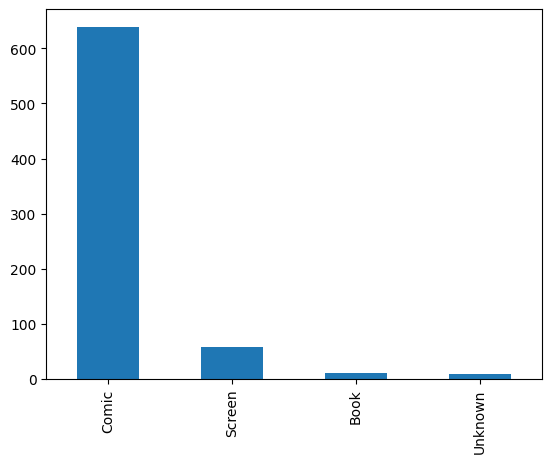

In [25]:
superheroes['Media'].value_counts().plot(kind = 'bar')

______________
#### Page 6 - Recoding from Continuous to Categorical in Python

**Recode `Height` from continuous to categorical**

*Calculate cm in 5 ft*

In [29]:
2.54 * 12 * 5

152.4

In [30]:
def heightRecode (series):
    if series < 152.4:
        return 0
    if series >= 152.4:
        return 1

superheroes['Height5FtYN'] = superheroes['Height'].apply(heightRecode)

superheroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,GenderR,Media,Height5FtYN
0,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,0.0,Screen,0
1,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,1.0,Comic,1
2,10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,0.0,Comic,1
3,11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0,0.0,Comic,1
4,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0,0.0,Comic,1


In [27]:
superheroes.Height5FtYN.value_counts()

1    501
0    233
Name: Height5FtYN, dtype: int64

______________
#### Page 7 - Recoding into the Same Variable in Python

**Recode `Gender` and `Alignment` in same variables**

In [48]:
superheroes.Gender.value_counts()

0    505
1    200
-     29
Name: Gender, dtype: int64

In [49]:
superheroes.Alignment.value_counts()

0    496
2    207
1     24
-      7
Name: Alignment, dtype: int64

In [50]:
superheroesCleanup = {
    'Gender': {'Male': 0, 'Female': 1}, 
    'Alignment': {'good': 0, 'neutral': 1, 'bad': 2}
}

superheroes.replace(superheroesCleanup, inplace=True)

superheroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,GenderR,Media,Height5FtYN
0,6,Adam Monroe,0,blue,-,Blond,-99.0,NBC - Heroes,-,0,-99.0,0.0,Screen,0
1,8,Agent 13,1,blue,-,Blond,173.0,Marvel Comics,-,0,61.0,1.0,Comic,1
2,10,Agent Zero,0,-,-,-,191.0,Marvel Comics,-,0,104.0,0.0,Comic,1
3,11,Air-Walker,0,blue,-,White,188.0,Marvel Comics,-,2,108.0,0.0,Comic,1
4,13,Alan Scott,0,blue,-,Blond,180.0,DC Comics,-,0,90.0,0.0,Comic,1


In [51]:
superheroes.Gender.value_counts()

0    505
1    200
-     29
Name: Gender, dtype: int64

In [47]:
superheroes.Alignment.value_counts()

0    496
2    207
1     24
-      7
Name: Alignment, dtype: int64


______________
#### Page 8 - Dummy Coding in Python

**Recode `Alignment` with dummy coding**

*First have to reload data since the last page wrote over it*

In [59]:
superheroes = pd.read_csv('/Users/hannah/Library/CloudStorage/GoogleDrive-gracesnouveaux@gmail.com/My Drive/Bethel Tech/Data Science/DSO104 Data Wrangling and Visualization/Lesson 3: Dealing with Missing or Incorrect Data Types/superheroes.csv')

superheroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
1,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
2,10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0
3,11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0
4,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0


In [60]:
alignmentDummy = pd.get_dummies(superheroes['Alignment'])

alignmentDummy

,-,bad,good,neutral
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
729,0,1,0,0
730,0,1,0,0
731,0,0,1,0
732,0,0,1,0


In [62]:
superheroes2 = pd.concat([superheroes, alignmentDummy], axis = 1)

superheroes2.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,-,bad,good,neutral
0,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,0,0,1,0
1,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,0,0,1,0
2,10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,0,0,1,0
3,11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0,0,1,0,0
4,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0,0,0,1,0
